This exercise is based on Prof. A. Ng lectures on machine learning (Stanford U.)

# Neural Network: forward prediction
Now we consider the problem of prediction of hand-written digits with a neural network. No training of the NN is done here, instead a solution is provided and only the *prediction* is done.  
We can talk about the problem as follow, we use the pixels of the hand-written digits as the input features. We get data from NMIST dataset (Stanford courses edited): 20x20 bits images: 400 input.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotnn as pnn
from scipy.io import loadmat
from itertools import product
from os.path import join

In [2]:
#Data files are in Matlab format
source_data=loadmat(join('data','ex6data1.mat'))
X,y=source_data['X'],source_data['y']
#for i in range(len(y)):
#    if y[i]==10:
#        y[i]=0
source_nn=loadmat(join('data','ex6weights.mat'))
Theta1,Theta2=source_nn['Theta1'],source_nn['Theta2']
print(X.shape,y.shape,Theta1.shape,Theta2.shape)

(5000, 400) (5000, 1) (25, 401) (10, 26)


**NOTE**: The original matlab exercise maps the digit `0` to `10`.

[2],[4],[2],[10],[7]
[8],[4],[9],[6],[7]
[7],[9],[8],[5],[4]
[6],[9],[7],[9],[5]
[8],[3],[9],[4],[2]


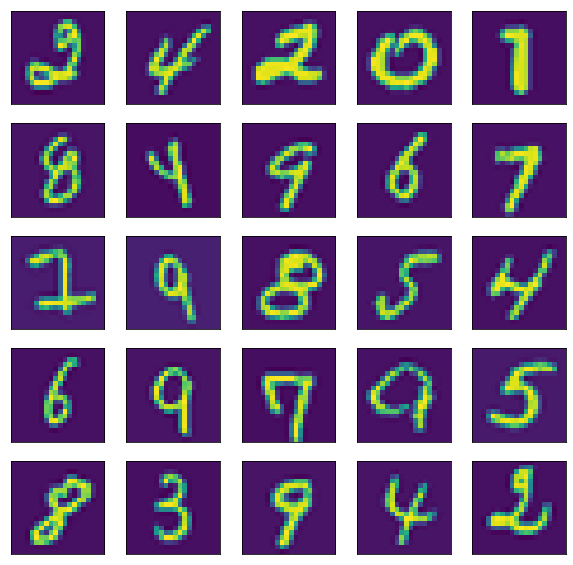

In [4]:
_,ax = plt.subplots(5,5,sharex=True,sharey=True,figsize=(10,10))
_toshow =np.random.randint(0,X.shape[0],(5,5))
for i,j in product(range(5),repeat=2):
    ax[i][j].matshow(X[_toshow[i][j]].reshape(20,20).T)
    ax[i][j].get_xaxis().set_visible(False)
    ax[i][j].get_yaxis().set_visible(False)
    endl=','
    if j==4:
        endl='\n'
    print(y[_toshow[i][j]],end=endl)

Let's consider a NN that has the 400 features (+1, bias) as input and the activation function is the sigmoid function. The NN is designed with:

1. An input layer with 400 neurons (plus bias)
 2. An hidden layer of 25 neurons
 3. An output layer of 10 neurons

Each output neuron will return the probability of the input being the digit associated to the output (first output neuron is associated to `1`, second to `2` and so on. The tenth neuron is associated to `10=0`). A further complication is that in python array numbering starts from 0 so we need to remember that: `output[0]` => `1`, `output[1]` => `2`, ..., `output[9]` => `10=0`. This complex numbering is due to the data being produced/prepared in matlab. A future version of this notebook will have reformatted input data. Sorry for that.  
This design is basically a logistic regression similar to the one used for the iris dataset, implemented with a NN.

In [5]:
print('Number of input features (including bias: %d). '\
      'Number of hidden layers neurons (including bias): %d '\
      'Number of output nuerons: %d'%(Theta1.shape[1],Theta1.shape[0],Theta2.shape[0]))

Number of input features (including bias: 401). Number of hidden layers neurons (including bias): 25 Number of output nuerons: 10


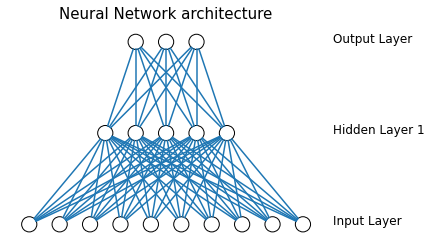

In [6]:
pnn.DrawNN([10,5,3]).draw()

In [8]:
sigmoid = lambda z: 1./(1+np.exp(-z))
def activation(X,Theta):
    '''
    Neuron activation function.
    :param: X the feature matrix (columns of ones added automatically).
            Rows are examples, columns features. with n+1 the number of features
    :param: Weights matrix for a given layer
            The matrix is (n+1)xk
    '''
    _x = np.append([[1]]*X.shape[0], X, axis=1)
    return sigmoid(_x*Theta)

We can write the problem in matrix notation considering:<br>
$n$ is the number of features in the examples (in this case number of pixels), $m$ is the number of examples.<br>
$\begin{eqnarray}
X & = & \begin{bmatrix}
        x_0^{(1)} & \cdots & x_n^{(1)} \\
        \cdots & \cdots & \cdots \\
        x_0^{(m)} & \cdots & x_n^{(m)}
        \end{bmatrix} &\in\mathbb{R}^{m\times(n+1)}~,~x_0^{(i)}=1~\forall~i
\end{eqnarray}$

Let's consider a neural network with $L$ layers (denoted by $l$), each layer has a number of neurons as $s_l$. The activation function is: $g(z)=sigmoid(z)$. We have to remember to add the bias. We call the input to the layer $a^{(l)}$ (with $a_0^{(l)}=1$) then the output of the layer is:<br>
$
a^{(l+1)} = \frac{1}{1+e^{a^{(l)}\cdot\Theta^{(l)}}} \\
$<br>
with:<br>
$\begin{eqnarray}
a^{(1)}&=&X &\in\mathbb{R}^{m\times(n+1)} \\
\Theta^{(1)} &=& \begin{bmatrix}
    \theta_{1,0}^{(l)} & \theta_{2,0}^{(l)} & \cdots & \theta_{s_{l+1},0}^{(l)} \\
    \theta_{1,1}^{(l)} & \theta_{2,1}^{(l)} & \cdots & \theta_{s_{l+1},1}^{(l)} \\
    \cdots & \cdots & \cdots & \cdots \\
    \theta_{1,s_l}^{(l)} & \theta_{2,s_l}^{(l)} & \cdots & \theta_{s_{l+1},s_l}^{(l)} \\
\end{bmatrix} & \in\mathbb{R}^{(s_l+1)\times s_{l+1}}
\end{eqnarray}$<br>
With this notation, $\Theta^{(1)}$ maps the input of layer ${l}$, $a^{(l)}$ (that resides in $\mathbb{R}^{s_l+1}$ space, the $+1$ comes from the bias term), to the output $a^{(l+1)}$ (that resides in $\mathbb{R}^{s_{l+1}}$), once the sigmoid function is applied.

The last ingredient is to rewrite the tergets in matrix form. The measured values for a given examples are: $y\in\{1,\cdots,k\}$ for a classification problem with $K$ classes (note the output layer $l=L$ has $K$ neurons). As for the one-vs-all logistic regression case, we write the expected values as:<br>
$
Y = \begin{bmatrix}
    ( y^{(1)} == 1 ) & ( y^{(1)} == 2 ) & \cdots & ( y^{(1)} == k ) \\
    ( y^{(2)} == 1 ) & ( y^{(2)} == 2 ) & \cdots & ( y^{(2)} == k ) \\
    \cdots & \cdots & \cdots & \cdots \\
    ( y^{(m)} == 1 ) & ( y^{(m)} == 2 ) & \cdots & ( y^{(m)} == k ) \\
    \end{bmatrix}~\in\mathbb{R}^{m\times K}
$

In [9]:
a2=activation(np.matrix(X),np.matrix(Theta1).T)#Transpose due to how matrix is used in exercise
a3=activation(np.matrix(a2),np.matrix(Theta2).T)
print(a3[:-3])
print(y[:-3])
print(np.argmax(a3,axis=1)[:-3]+1)
predictions=np.argmax(a3,axis=1)+1

[[1.12661530e-04 1.74127856e-03 2.52696959e-03 ... 4.01468105e-04
  6.48072305e-03 9.95734012e-01]
 [4.79026796e-04 2.41495958e-03 3.44755685e-03 ... 2.39107046e-03
  1.97025086e-03 9.95696931e-01]
 [8.85702310e-05 3.24266731e-03 2.55419797e-02 ... 6.22892325e-02
  5.49803551e-03 9.28008397e-01]
 ...
 [3.80167426e-04 2.28985844e-02 1.47746729e-05 ... 8.59726270e-03
  8.59606573e-01 3.40493629e-03]
 [1.97154652e-03 1.91272895e-04 5.92996803e-04 ... 2.35508039e-03
  9.54587919e-01 1.65650074e-04]
 [4.79800754e-05 1.80960882e-03 2.34096921e-05 ... 3.07023627e-02
  9.71134294e-01 6.38775666e-03]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [10]:
from sklearn import metrics

To judge the quality of the classification we can use some utilities.<br>
For example the classification report shows for each class (the rows, e.g. the digits) some statistical numbers:
 * *precision* the ratio between the number of true positive and all positive (e.g. among all classified as *1*s, the fraction that are real *1*s)
 * *recall* the fraction of correctly identified among all real (e.g. the fraction of identifies *1*s over all real *1*s)
 * *f1-score* is a quality metrics based on the two
The confusion matrix shows how the misinterpreation happended.

In [11]:
print(metrics.classification_report(y,predictions))
print(metrics.confusion_matrix(y,predictions))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

[[491   1   1   2   0   0   1   3   1   0]
 [  1 485   0   3   1   3   1   2   1   3]
 [  2   2 480   0   8   1   4   1   2   0]
 [  2   2   0 484   0   3   0   1   8   0]
 [  0   1   4   1 492   2   0   0   0   0]
 [  2   0   0   0   3 493 

## Using `sklearn.MPLClassifier`
This example done by hand can be done by the Multi-layer Perceptron classifier neural network using the logistic function as activation. We can train the network and check the performances in that case

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [25]:
classifier = MLPClassifier(hidden_layer_sizes=(25,10),
                           activation='logistic',
                           solver='lbfgs')
#Just to try that works less then perfectly,
#predicting on training gives almost 100% accuracy
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier.fit(train_X,train_y.ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
predictions2=classifier.predict(test_X)

In [27]:
print(metrics.classification_report(test_y,predictions2))
print(metrics.confusion_matrix(test_y,predictions2))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       109
           2       0.88      0.81      0.84       103
           3       0.82      0.88      0.85        84
           4       0.91      0.89      0.90       102
           5       0.89      0.90      0.89       108
           6       0.91      0.93      0.92       117
           7       0.96      0.92      0.94       109
           8       0.86      0.87      0.87        95
           9       0.83      0.90      0.86        84
          10       0.94      0.90      0.92        89

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.90      0.90      0.89      1000
weighted avg       0.90      0.90      0.90      1000

[[104   2   1   0   1   0   0   1   0   0]
 [  1  83   6   2   0   3   0   7   0   1]
 [  0   2  74   0   4   0   1   1   2   0]
 [  1   0   0  91   0   2   0   1   7   0]
 [  0   0   3   1  97   3   1   0   1   2]
 [  0   2   0   2   1 109 